#Liberies Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve,
    confusion_matrix, classification_report, roc_auc_score, roc_curve)

In [2]:
df = pd.read_csv("Loan_default.csv")
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


# Exploratory Data Analysis (EDA)

In [4]:
df.shape

(255347, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [9]:
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.50,14.99,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.30,38963.01,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.87,70840.71,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.26,158.90,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.54,34.64,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.50,1.12,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.49,6.64,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.03,16.97,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.50,0.23,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.12,0.32,0.0,0.00,0.00,0.00,1.0


# Data Cleaning

In [ ]:
# Verificaando se existe valores nulos
df.isnull().sum()

,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0
Education,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Removendo o campo "LoanID", pois é apenas um identificador único, não útil para previsão.
df = df.drop('LoanID', axis=1)

#Statistical tests

In [ ]:
cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed']

for col in cols:
    plt.figure(figsize=(15, 4))

    # Histograma com densidade (removendo NaN)
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True, color='skyblue')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

    # Boxplot (removendo NaN)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col].dropna(), color='lightcoral')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

In [ ]:
from scipy.stats import shapiro

cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed']

for col in cols:
    stat, p = shapiro(df[col])
    print(col)
    print(f"Test Statistic: {stat:.4f}")
    print(f"P-value: {p:.4f}")
    if p > 0.05:
        print(f"A distribuição de {col} parece seguir uma distribuição normal (p > 0.05 - fail to reject H0)")
        print("-" * 90)
    else:
        print(f"A distribuição de {col} NÃO parece seguir uma distribuição normal (p <= 0.05 - reject H0)")
        print("-" * 90)

In [ ]:
sns.countplot(x='Default', data=df)
plt.title("Distribuição da Variável Alvo")
plt.xlabel("Default (0 = Não inadimplente, 1 = Inadimplente)")
plt.ylabel("Contagem")
plt.show()

#Coding of Categorical Variables

In [ ]:
binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

###Ordinal Encoding

In [ ]:
maping_of_education={'High School':0,"Bachelor's":1,"Master's":2,'PhD':3}
df['Education']=df['Education'].map(maping_of_education)

###One-Hot Encoding

In [ ]:
df = pd.get_dummies(df, columns=[
    'EmploymentType', 'MaritalStatus', 'LoanPurpose'
], drop_first=True)

#Train-Test Split

In [ ]:
# Separar X (features) e y (alvo)
X = df.drop("Default", axis=1)
y = df["Default"]

# Etapa 1: Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Class Balancing

In [ ]:
# Ver distribuição original da classe no treino
print("Antes do SMOTE (treino):")
print(y_train.value_counts())

# Etapa 2: Aplicar SMOTE no treino
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Ver distribuição após SMOTE
print("\nDepois do SMOTE (treino):")
print(y_train_resampled.value_counts())

Antes do SMOTE (treino):
Default
0    180555
1     23722
Name: count, dtype: int64

Depois do SMOTE (treino):
Default
0    180555
1    180555
Name: count, dtype: int64


#Data Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Lista de colunas numéricas a padronizar
num_cols = [
    'Age', 'Income', 'LoanAmount', 'CreditScore',
    'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
    'DTIRatio',	'Education'
]

# Instanciar e aplicar o scaler
scaler = StandardScaler()

X_train_scaled = X_train_resampled.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train_resampled[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

# ❗Não aplique StandardScaler nas colunas binárias (0/1) ou one-hot encoded — isso pode atrapalhar o modelo.

# Machine Learning Models

## Logistic Regression

In [ ]:
# Criar o modelo com parâmetros padrão
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train_resampled)

y_pred_lr = lr.predict(X_test_scaled)
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]  # Probabilidades para a classe 1

Acurácia: 0.803172116702565
Precisão: 0.24671173939766441
Recall: 0.33839150227617604
F1 Score: 0.28536897483293044
AUC-ROC: 0.6770808873255805

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89     45139
           1       0.25      0.34      0.29      5931

    accuracy                           0.80     51070
   macro avg       0.58      0.60      0.59     51070
weighted avg       0.83      0.80      0.82     51070



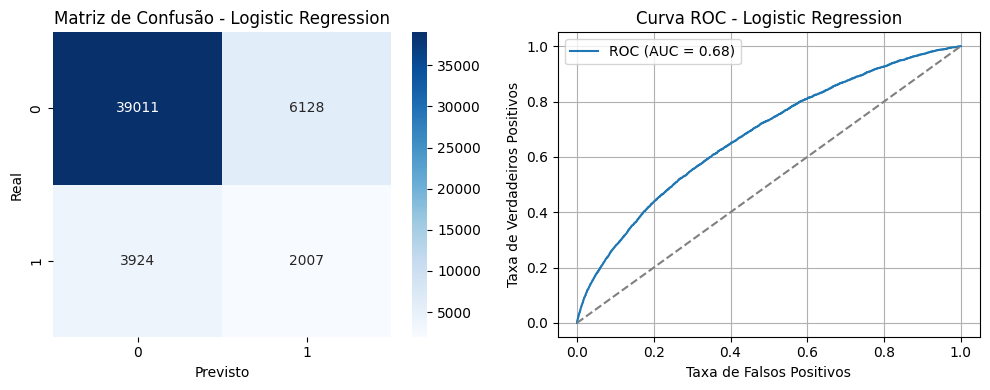

In [ ]:
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print("Precisão:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Matriz de Confusão e Curva ROC lado a lado
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Matriz de Confusão
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Matriz de Confusão - Logistic Regression")
axes[0].set_xlabel("Previsto")
axes[0].set_ylabel("Real")

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
axes[1].plot(fpr, tpr, label=f'ROC (AUC = {roc_auc_score(y_test, y_proba_lr):.2f})')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[1].set_title("Curva ROC - Logistic Regression")
axes[1].set_xlabel("Taxa de Falsos Positivos")
axes[1].set_ylabel("Taxa de Verdadeiros Positivos")
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

Best Threshold≈ 0.58
Precisão: 0.24723618090452262
Recall: 0.45624683864441073
F1 Score: 0.32069165127171684


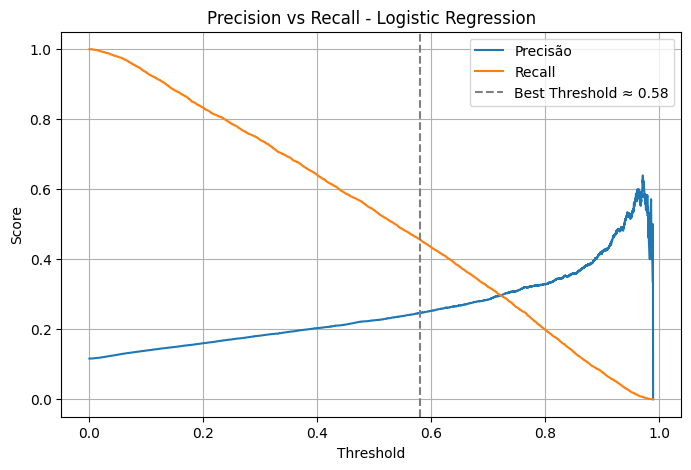

In [ ]:
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, y_proba_lr)

# Calcular F1 score para cada threshold
f1_scores_lr = 2 * (precision_lr * recall_lr) / (precision_lr + recall_lr + 1e-6)

# Melhor índice de F1
best_idx_lr = np.argmax(f1_scores_lr)
best_threshold_lr = thresholds_lr[best_idx_lr]

print(f"Best Threshold≈ {best_threshold_lr:.2f}")
print("Precisão:", precision_lr[best_idx_lr])
print("Recall:", recall_lr[best_idx_lr])
print("F1 Score:", f1_scores_lr[best_idx_lr])

plt.figure(figsize=(8, 5))
plt.plot(thresholds_lr, precision_lr[:-1], label='Precisão')
plt.plot(thresholds_lr, recall_lr[:-1], label='Recall')
# plt.plot(thresholds_lr, f1_scores_lr[:-1], label='F1 Score', color='purple')

# Marcar o melhor threshold
plt.axvline(best_threshold_lr, color='gray', linestyle='--', label=f'Best Threshold ≈ {best_threshold_lr:.2f}')

plt.title("Precision vs Recall - Logistic Regression")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()

In [ ]:
y_pred_best_lr = (y_proba_lr >= best_threshold_lr).astype(int)
print(classification_report(y_test, y_pred_best_lr))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87     45139
           1       0.25      0.46      0.32      5931

    accuracy                           0.78     51070
   macro avg       0.58      0.64      0.59     51070
weighted avg       0.84      0.78      0.80     51070



## Random Florest Classifier

In [ ]:
# Instanciar com parâmetros básicos
rf = RandomForestClassifier(
    n_estimators=100,
    max_leaf_nodes=16,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_scaled, y_train_resampled)
y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

Acurácia: 0.782181319757196
Precisão: 0.19965297860034703
Recall: 0.2910133198448828
F1 Score: 0.23682766190998902
AUC-ROC: 0.6430613497282897

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87     45139
           1       0.20      0.29      0.24      5931

    accuracy                           0.78     51070
   macro avg       0.55      0.57      0.55     51070
weighted avg       0.82      0.78      0.80     51070

Confusion Matrix:
 [[38220  6919]
 [ 4205  1726]]


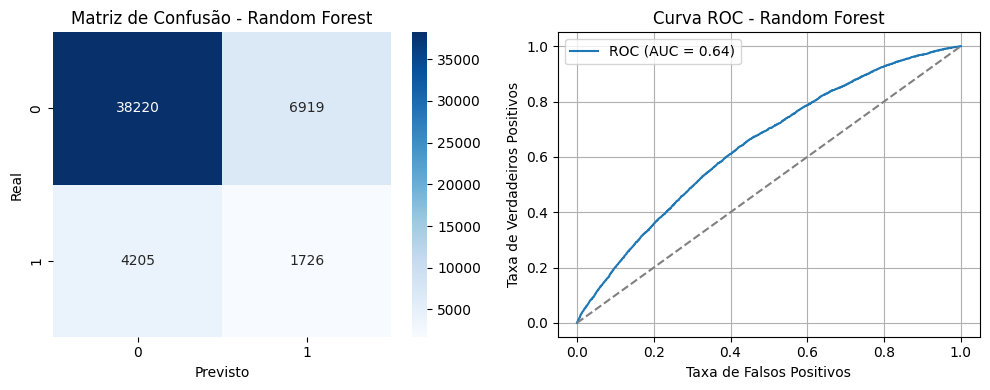

In [ ]:
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Precisão:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Matriz de Confusão e Curva ROC lado a lado
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Matriz de Confusão
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Matriz de Confusão - Random Forest")
axes[0].set_xlabel("Previsto")
axes[0].set_ylabel("Real")

# Curva ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
axes[1].plot(fpr_rf, tpr_rf, label=f'ROC (AUC = {roc_auc_score(y_test, y_proba_rf):.2f})')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[1].set_title("Curva ROC - Random Forest")
axes[1].set_xlabel("Taxa de Falsos Positivos")
axes[1].set_ylabel("Taxa de Verdadeiros Positivos")
axes[1].legend()
axes[1].grid()
plt.tight_layout()
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring='roc_auc',           # você pode trocar por 'recall' ou 'roc_auc'
    cv=3,                   # 3-fold cross-validation
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train_resampled)

print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

print("\nMelhor score de validação (F1):")
print(grid_search.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Melhores hiperparâmetros encontrados:
{'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Melhor score de validação (F1):
0.9623479538608063


In [ ]:
y_pred_gd = grid_search.predict(X_test_scaled)
y_proba_gd = grid_search.predict_proba(X_test_scaled)[:, 1]
print("Acurácia:", accuracy_score(y_test, y_pred_gd))
print("Precisão:", precision_score(y_test, y_pred_gd))
print("Recall:", recall_score(y_test, y_pred_gd))
print("F1 Score:", f1_score(y_test, y_pred_gd))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_gd))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gd))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gd))

Acurácia: 0.8842764832582729
Precisão: 0.5254237288135594
Recall: 0.03658742201989546
F1 Score: 0.06841109709962169
AUC-ROC: 0.7340561923920875

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.53      0.04      0.07      5931

    accuracy                           0.88     51070
   macro avg       0.71      0.52      0.50     51070
weighted avg       0.85      0.88      0.84     51070

Confusion Matrix:
 [[44943   196]
 [ 5714   217]]


In [ ]:
rf_best = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_best.fit(X_train_scaled, y_train_resampled)
y_pred_rf_best = rf_best.predict(X_test_scaled)
y_proba_rf_best = rf_best.predict_proba(X_test_scaled)[:, 1]

print("Acurácia:", accuracy_score(y_test, y_pred_rf_best))
print("Precisão:", precision_score(y_test, y_pred_rf_best))
print("Recall:", recall_score(y_test, y_pred_rf_best))
print("F1 Score:", f1_score(y_test, y_pred_rf_best))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_rf_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_best))

Acurácia: 0.8606030937928334
Precisão: 0.30613577023498695
Recall: 0.15815208227954813
F1 Score: 0.2085603112840467
AUC-ROC: 0.7161263100651772

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92     45139
           1       0.31      0.16      0.21      5931

    accuracy                           0.86     51070
   macro avg       0.60      0.56      0.57     51070
weighted avg       0.83      0.86      0.84     51070

Confusion Matrix:
 [[43013  2126]
 [ 4993   938]]


In [ ]:
# Obter a importância das features do melhor modelo Random Forest
feature_importances = rf_best.feature_importances_

# Criar um DataFrame para visualizar a importância das features
features_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': feature_importances
})

# Ordenar as features por importância
features_df = features_df.sort_values(by='Importance', ascending=False)

# Exibir as features mais importantes
print("Variáveis mais importantes (Random Forest):")
print(features_df)

Variáveis mais importantes (Random Forest):
                         Feature  Importance
0                            Age    0.101490
6                   InterestRate    0.085081
7                       LoanTerm    0.072518
1                         Income    0.067290
4                 MonthsEmployed    0.064398
2                     LoanAmount    0.058735
12                   HasCoSigner    0.053590
3                    CreditScore    0.050824
11                 HasDependents    0.050344
8                       DTIRatio    0.049285
9                      Education    0.044836
15     EmploymentType_Unemployed    0.042103
10                   HasMortgage    0.039713
14  EmploymentType_Self-employed    0.038854
13      EmploymentType_Part-time    0.037717
5                 NumCreditLines    0.025826
16         MaritalStatus_Married    0.024095
17          MaritalStatus_Single    0.021756
18          LoanPurpose_Business    0.018543
19         LoanPurpose_Education    0.018494
21         

In [ ]:
columns_to_drop = [
    'NumCreditLines',
    'MaritalStatus_Married',
    'MaritalStatus_Single',
    'LoanPurpose_Business',
    'LoanPurpose_Education',
    'LoanPurpose_Other',
    'LoanPurpose_Home'
]

df = df.drop(columns=columns_to_drop, axis=1)
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,LoanTerm,DTIRatio,Education,HasMortgage,HasDependents,HasCoSigner,Default,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed
0,56,85994,50587,520,80,15.23,36,0.44,1,1,1,1,0,False,False,False
1,69,50432,124440,458,15,4.81,60,0.68,2,0,0,1,0,False,False,False
2,46,84208,129188,451,26,21.17,24,0.31,2,1,1,0,1,False,False,True
3,32,31713,44799,743,0,7.07,24,0.23,0,0,0,0,0,False,False,False
4,60,20437,9139,633,8,6.51,48,0.73,1,0,1,0,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,14.11,12,0.85,1,0,0,0,0,False,False,False
255343,32,51953,189899,511,14,11.55,24,0.21,0,0,0,0,1,True,False,False
255344,56,84820,208294,597,70,5.29,60,0.50,0,1,1,1,0,False,True,False
255345,42,85109,60575,809,40,20.90,48,0.44,0,1,1,0,0,True,False,False


In [ ]:
df.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'HasMortgage', 'HasDependents', 'HasCoSigner', 'Default',
       'EmploymentType_Part-time', 'EmploymentType_Self-employed',
       'EmploymentType_Unemployed', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'LoanPurpose_Business', 'LoanPurpose_Education',
       'LoanPurpose_Home', 'LoanPurpose_Other'],
      dtype='object')

Melhor Threshold com base no F1 Score: 0.23
Precisão: 0.28
Recall: 0.47
F1 Score: 0.35


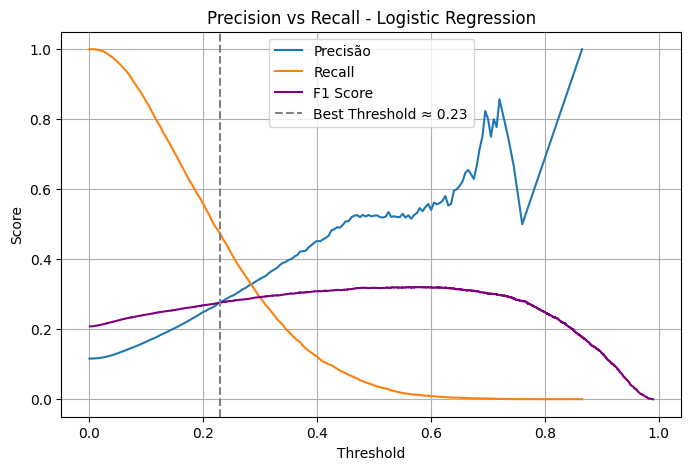

In [ ]:
precision_rf_best, recall_rf_best, thresholds_rf_best = precision_recall_curve(y_test, y_proba_rf_best)

# Calcular F1 score para cada threshold
f1_scores_rf_best = 2 * (precision_rf_best * recall_rf_best) / (precision_rf_best + recall_rf_best + 1e-6)

# Melhor índice de F1
best_idx_rf_best = np.argmax(f1_scores_rf_best)
best_threshold_rf_best = thresholds_rf_best[best_idx_rf_best]

print(f"Melhor Threshold com base no F1 Score: {best_threshold_rf_best:.2f}")
print(f"Precisão: {precision_rf_best[best_idx_rf_best]:.2f}")
print(f"Recall: {recall_rf_best[best_idx_rf_best]:.2f}")
print(f"F1 Score: {f1_scores_rf_best[best_idx_rf_best]:.2f}")

plt.figure(figsize=(8, 5))
plt.plot(thresholds_rf_best, precision_rf_best[:-1], label='Precisão')
plt.plot(thresholds_rf_best, recall_rf_best[:-1], label='Recall')
plt.plot(thresholds_lr, f1_scores_lr[:-1], label='F1 Score', color='purple')

# Marcar o melhor threshold
plt.axvline(best_threshold_rf_best, color='gray', linestyle='--', label=f'Best Threshold ≈ {best_threshold_rf_best:.2f}')

plt.title("Precision vs Recall - Logistic Regression")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Criando e treinando o modelo
et = ExtraTreesClassifier(
    n_estimators=200,       # número de árvores
    max_depth=None,         # profundidade máxima (None = cresce até folha pura)
    min_samples_split=2,    # mínimo de amostras para dividir um nó
    random_state=42,
    n_jobs=-1               # usa todos os núcleos do processador
)

et.fit(X_train_scaled, y_train_resampled)

# Predições
y_pred_et = et.predict(X_test_scaled)
y_prob_et = et.predict_proba(X_test_scaled)[:, 1]

# Métricas
acc = accuracy_score(y_test, y_pred_et)
prec = precision_score(y_test, y_pred_et)
rec = recall_score(y_test, y_pred_et)
f1 = f1_score(y_test, y_pred_et)
auc = roc_auc_score(y_test, y_prob_et)

print("Acurácia:", acc)
print("Precisão:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("AUC-ROC:", auc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_et))


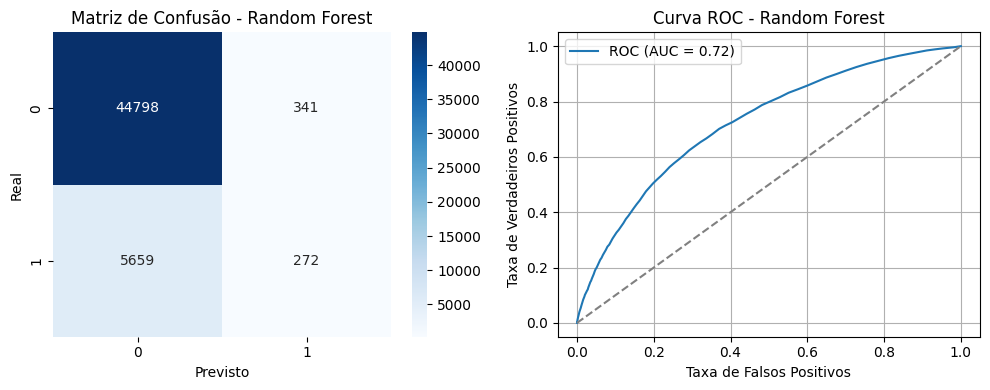

In [ ]:
# Matriz de Confusão e Curva ROC lado a lado
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Matriz de Confusão
sns.heatmap(confusion_matrix(y_test, y_pred_et), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Matriz de Confusão - Random Forest")
axes[0].set_xlabel("Previsto")
axes[0].set_ylabel("Real")

# Curva ROC
fpr_et, tpr_et, _ = roc_curve(y_test, y_prob_et)
axes[1].plot(fpr_et, tpr_et, label=f'ROC (AUC = {roc_auc_score(y_test, y_prob_et):.2f})')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[1].set_title("Curva ROC - Random Forest")
axes[1].set_xlabel("Taxa de Falsos Positivos")
axes[1].set_ylabel("Taxa de Verdadeiros Positivos")
axes[1].legend()
axes[1].grid()
plt.tight_layout()
plt.show()

In [ ]:
best_rf = grid_search.best_estimator_
y_proba_best_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

# Threshold padrão (0.5) ou ajustado
threshold = 0.5  # ou 0.2, ou 0.1, conforme teste
y_pred_best_rf = (y_proba_best_rf >= threshold).astype(int)

from sklearn.metrics import classification_report, roc_auc_score

print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_best_rf)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_rf))

Hiperparametros Tuning

In [ ]:
# Espaço de busca mais amplo
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': ['balanced']  # Muito importante no seu caso!
}
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=30,                 # número de combinações a testar
    scoring='roc_auc',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train_scaled, y_train_resampled)

print("Melhores hiperparâmetros encontrados:")
print(random_search.best_params_)

print("\nMelhor score de validação (roc_auc):")
print(random_search.best_score_)

In [ ]:
best_rf_model = random_search.best_estimator_
y_proba_rf_random = best_rf_model.predict_proba(X_test_scaled)[:, 1]

# Threshold ajustado
threshold = 0.3
y_pred_rf_random = (y_proba_rf_random >= threshold).astype(int)

from sklearn.metrics import classification_report, roc_auc_score

print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_rf_random)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_random))

scoring='recall'
scoring='roc_auc'

##SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(
    loss='log_loss',       # Regressão logística
    penalty='l2',
    max_iter=1000,
    tol=1e-3,
    random_state=42,
    class_weight='balanced'
)

sgd.fit(X_train_scaled, y_train_resampled)


SGDClassifier(class_weight='balanced', loss='log_loss', random_state=42)

In [ ]:
y_proba_sgd = sgd.predict_proba(X_test_scaled)[:, 1]
y_pred_sgd = sgd.predict(X_test_scaled)

threshold = 0.5
y_pred_sgd = (y_proba_sgd >= threshold).astype(int)


print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_sgd)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_sgd))

AUC-ROC: 0.7106394553560367

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.76      0.84     45139
           1       0.23      0.53      0.32      5931

    accuracy                           0.73     51070
   macro avg       0.58      0.65      0.58     51070
weighted avg       0.84      0.73      0.78     51070



In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_svm = SGDClassifier(
    loss='hinge',               # SVM linear
    penalty='l2',
    max_iter=1000,
    tol=1e-3,
    random_state=42,
    class_weight='balanced'
)

sgd_svm.fit(X_train_scaled, y_train_resampled)

SGDClassifier(class_weight='balanced', random_state=42)

In [ ]:
decision_scores = sgd_svm.decision_function(X_test_scaled)
threshold = -0.3  # mais baixo = mais recall
y_pred_svm = (decision_scores >= threshold).astype(int)
# ROC-AUC pode ser calculado com os scores de decisão
print(f"AUC-ROC: {roc_auc_score(y_test, decision_scores)}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

AUC-ROC: 0.7110756882030917

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.67      0.78     45139
           1       0.20      0.64      0.31      5931

    accuracy                           0.67     51070
   macro avg       0.57      0.65      0.54     51070
weighted avg       0.85      0.67      0.73     51070



Melhor Threshold com base no F1 Score: 0.14
Precisão: 0.23
Recall: 0.50
F1 Score: 0.32


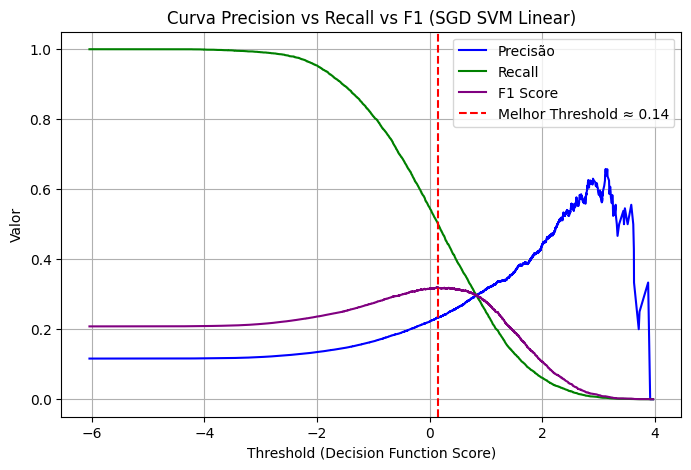

In [ ]:
# Scores de distância da margem
decision_scores = sgd_svm.decision_function(X_test_scaled)
precision, recall, thresholds = precision_recall_curve(y_test, decision_scores)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"Melhor Threshold com base no F1 Score: {best_threshold:.2f}")
print(f"Precisão: {precision[best_idx]:.2f}")
print(f"Recall: {recall[best_idx]:.2f}")
print(f"F1 Score: {f1_scores[best_idx]:.2f}")

plt.figure(figsize=(8, 5))

plt.plot(thresholds, precision[:-1], label='Precisão', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.plot(thresholds, f1_scores[:-1], label='F1 Score', color='purple')

plt.axvline(best_threshold, color='red', linestyle='--', label=f'Melhor Threshold ≈ {best_threshold:.2f}')

plt.title('Curva Precision vs Recall vs F1 (SGD SVM Linear)')
plt.xlabel('Threshold (Decision Function Score)')
plt.ylabel('Valor')
plt.grid()
plt.legend()
plt.show()

##XGBoost

In [ ]:
from xgboost import XGBClassifier
# Contar as classes no conjunto de treino balanceado pelo SMOTE
neg, pos = np.bincount(y_train_resampled)
scale = neg / pos

print(f"Negativos: {neg}, Positivos: {pos}")
print(f"scale_pos_weight: {scale:.2f}")


Negativos: 180555, Positivos: 180555
scale_pos_weight: 1.00


In [ ]:
xgb = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale,
    n_jobs=-1
)

xgb.fit(X_train_scaled, y_train_resampled)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:38:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, ...)

In [ ]:
y_proba_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

# Threshold padrão (0.5) ou outro mais agressivo
threshold = 0.5
y_pred_xgb = (y_proba_xgb >= threshold).astype(int)
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_xgb)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

AUC-ROC: 0.744648433390199

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     45139
           1       0.52      0.09      0.15      5931

    accuracy                           0.88     51070
   macro avg       0.71      0.54      0.55     51070
weighted avg       0.85      0.88      0.85     51070

